In [5]:
# -*- coding: utf-8 -*-
import pylab as pl
import pandas as pd
%pylab inline
dataset.describe()

Populating the interactive namespace from numpy and matplotlib


,Rank,Name,Unit,Date
count,1169,1169,1169,1169
unique,26,1165,395,733
top,FIREFIGHTER,JOHN J. FINLEY,LADDER 7,"September 11, 2001"
freq,820,2,14,343


In [42]:
dataset = pd.read_csv("/Users/fbianco/Downloads/FDNY_Line_Of_Duty_Deaths.csv")
#dataset.Date = pd.to_datetime(dataset.Date, format = "%Y")

dataset.Date = pd.to_datetime(dataset.Date).apply( lambda x: x.date() )
dataset.Date

0       1924-04-10
1       1934-04-10
2       1948-04-10
3       1952-04-10
4       1969-04-10
5       1896-04-01
6       1917-04-12
7       1917-04-12
8       1901-04-14
9       1927-04-14
10      1965-04-14
11      1977-04-15
12      1868-04-16
13      1916-04-16
14      2012-04-16
15      1939-04-17
16      1957-04-17
17      1968-04-17
18      1924-04-18
19      2002-04-18
20      1930-04-19
21      1945-04-19
22      1945-04-20
23      1970-04-20
24      1951-04-22
25      1910-04-23
26      2005-04-23
27      1905-04-25
28      1912-04-25
29      1935-04-26
           ...    
1139    1921-09-18
1140    1969-09-19
1141    1963-09-02
1142    1945-09-22
1143    1953-09-22
1144    1960-09-22
1145    1911-09-24
1146    1922-09-24
1147    1937-09-24
1148    1951-09-24
1149    1997-09-24
1150    1907-09-25
1151    1927-09-26
1152    1959-09-26
1153    2003-09-27
1154    1907-09-28
1155    1925-09-29
1156    1896-09-30
1157    1938-09-03
1158    1956-09-03
1159    1935-09-05
1160    1944

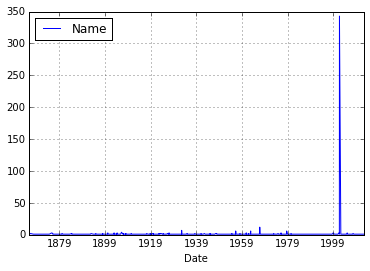

In [83]:
FSNYts = dataset[['Date', 'Name']].groupby('Date').count()#.agg('count')
FSNYts.plot()
#FSNYts.plot('Date', 'Rank')
#FDNSts.plot()
#FDNYts = pd.groupby(dataset, 'Date').count().Date


1.59481582538 12.6439611874
[39.526699387563959, -36.337067736813616]


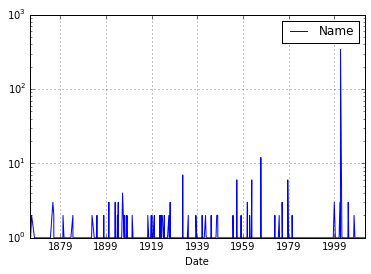

In [138]:
FSNYts.plot(logy=True)
print FSNYts['Name'].mean(), FSNYts['Name'].std()
thresholds = [FSNYts['Name'].mean()+3*FSNYts['Name'].std(), FSNYts['Name'].mean()-3*FSNYts['Name'].std()]
print thresholds

In [103]:
FSNYts.columns


Index([u'Name'], dtype='object')

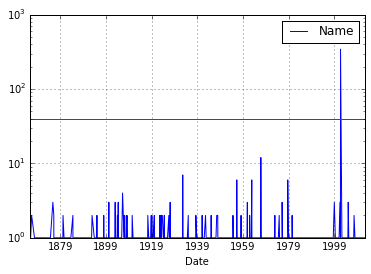

In [97]:
ax = FSNYts.plot(logy=True)
ax.plot([min(FSNYts.index), max(FSNYts.index)], 
        [FSNYts.mean() + FSNYts.std()*3, FSNYts.mean() + FSNYts.std()*3])
ax.plot([min(FSNYts.index), max(FSNYts.index)], 
        [FSNYts.mean() - FSNYts.std()*3, FSNYts.mean() - FSNYts.std()*3])

In [139]:
FSNYts.loc[(FSNYts.Name>thresholds[0])]

,Name
Date,
2001-09-11,343
